In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
cols=["src_bytes","dst_bytes","land","wrong_fragment","class"]
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score

In [2]:
dff=pd.read_csv('Train_data.csv')
dff.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [3]:
df=dff[cols]

In [4]:
df["labels"] = df["class"].apply(lambda x: 1 if x == "anomaly" else 0)
df.drop(["class"],axis=1,inplace=True)

In [5]:
df.head()

src_bytes  dst_bytes  land  wrong_fragment  labels
0        491          0     0               0       0
1        146          0     0               0       0
2          0          0     0               0       1
3        232       8153     0               0       0
4        199        420     0               0       0

In [6]:
encoder=MinMaxScaler()

In [7]:
df_scaled=encoder.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=cols)

In [8]:
df_scaled.head()

src_bytes  dst_bytes  land  wrong_fragment  class
0  1.286320e-06   0.000000   0.0             0.0    0.0
1  3.824902e-07   0.000000   0.0             0.0    0.0
2  0.000000e+00   0.000000   0.0             0.0    1.0
3  6.077927e-07   0.001583   0.0             0.0    0.0
4  5.213394e-07   0.000082   0.0             0.0    0.0

In [9]:
y=df_scaled["class"]
x=df_scaled.drop(["class"],axis=1)



In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [12]:
y_pred=(y_pred>.5).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5387973804326255

In [14]:
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70      2674
         1.0       1.00      0.02      0.03      2365

    accuracy                           0.54      5039
   macro avg       0.77      0.51      0.37      5039
weighted avg       0.75      0.54      0.39      5039



Text(50.722222222222214, 0.5, 'Actual')

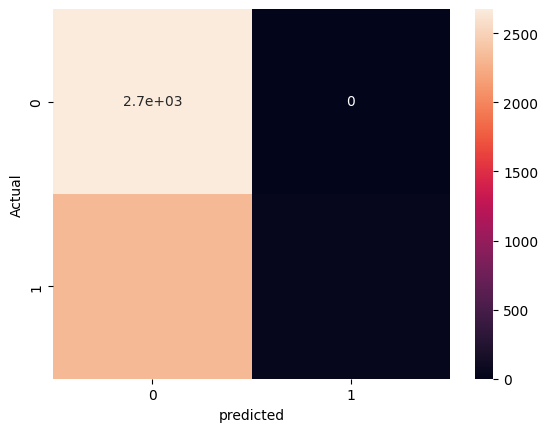

In [15]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Actual")